In [64]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append('../scripts/')
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.plot import show 
from rasterio.plot import plotting_extent
from dotenv import load_dotenv
from osdatahub import NGD

# Import custom classes
from mask_os import Mask, Text_Mask, RasterPlotter, CombinedMask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create Urban-Mask

In [2]:
# Set API key, details from https://github.com/OrdnanceSurvey/osdatahub
load_dotenv()
key_os = os.environ['KEY']

In [3]:
ngd_collections = NGD.get_collections()
for collection in ngd_collections['collections']:
    print(f' - {collection["title"]} ({collection["id"]})')

 - Building v1 (bld-fts-building-1)
 - Building Line v1 (bld-fts-buildingline-1)
 - Building Part v1 (bld-fts-buildingpart-1)
 - Named Area v1 (gnm-fts-namedarea-1)
 - Named Point v1 (gnm-fts-namedpoint-1)
 - Land v1 (lnd-fts-land-1)
 - Landform v1 (lnd-fts-landform-1)
 - Landform Line v1 (lnd-fts-landformline-1)
 - Landform Point v1 (lnd-fts-landformpoint-1)
 - Land Point v1 (lnd-fts-landpoint-1)
 - Site v1 (lus-fts-site-1)
 - Site Access Location v1 (lus-fts-siteaccesslocation-1)
 - Site Routing Point v1 (lus-fts-siteroutingpoint-1)
 - Compound Structure v1 (str-fts-compoundstructure-1)
 - Structure v1 (str-fts-structure-1)
 - Structure Line v1 (str-fts-structureline-1)
 - Structure Point v1 (str-fts-structurepoint-1)
 - Cartographic Rail Detail v1 (trn-fts-cartographicraildetail-1)
 - Rail v1 (trn-fts-rail-1)
 - Road Line v1 (trn-fts-roadline-1)
 - Road Track Or Path v1 (trn-fts-roadtrackorpath-1)
 - Connecting Link v1 (trn-ntwk-connectinglink-1)
 - Connecting Node v1 (trn-ntwk-conn

In [19]:
# define layer for bbox extent & OS-API collection
lyr = "../content/tifs/1k_tifs/SK1868.tif"

# define os collections for urban mask aggreation
collections = {'buildings' : 'bld-fts-buildingpart-1',
               'sites' : 'lus-fts-site-1', 
               'railways' : 'trn-fts-rail-1', 
               'land' : 'lnd-fts-land-1',
               'water' : 'wtr-fts-waterpoint-1',
               'road' : 'trn-fts-roadline-1',
               'track' : 'trn-fts-roadtrackorpath-1',
               'waterlink' : 'wtr-ntwk-waterlink-1',
               'waterlinkset' : 'wtr-ntwk-waterlinkset-1'}

# if specifics are required from 'collection' define which to keep from 'description' column
subsets = {'Land' : ['Made Surface', 'Residential Garden', 'Non-Coniferous Trees', 'Coniferous Trees', 'Mixed Trees']}

In [22]:
# create object (eventually loop through 500 1k tiles here?)
SK1868 = Mask(lyr, collections, subsets)
# get the bbox of the layer
SK1868.bb()
# query the os api and return and geonadas (geopandas df)
SK1868 = SK1868.os_mask()

ngd_buildings query contains the following number of features:18
ngd_sites query contains the following number of features:1
railways query is empty!
ngd_land query contains the following number of features:129
ngd_water query contains the following number of features:1
road query is empty!
ngd_track query contains the following number of features:34
waterlink query is empty!
waterlinkset query is empty!
-- Total OS Collections Data Set Contains: 183 values
-- Final Subsetted Data Set Contains: 90


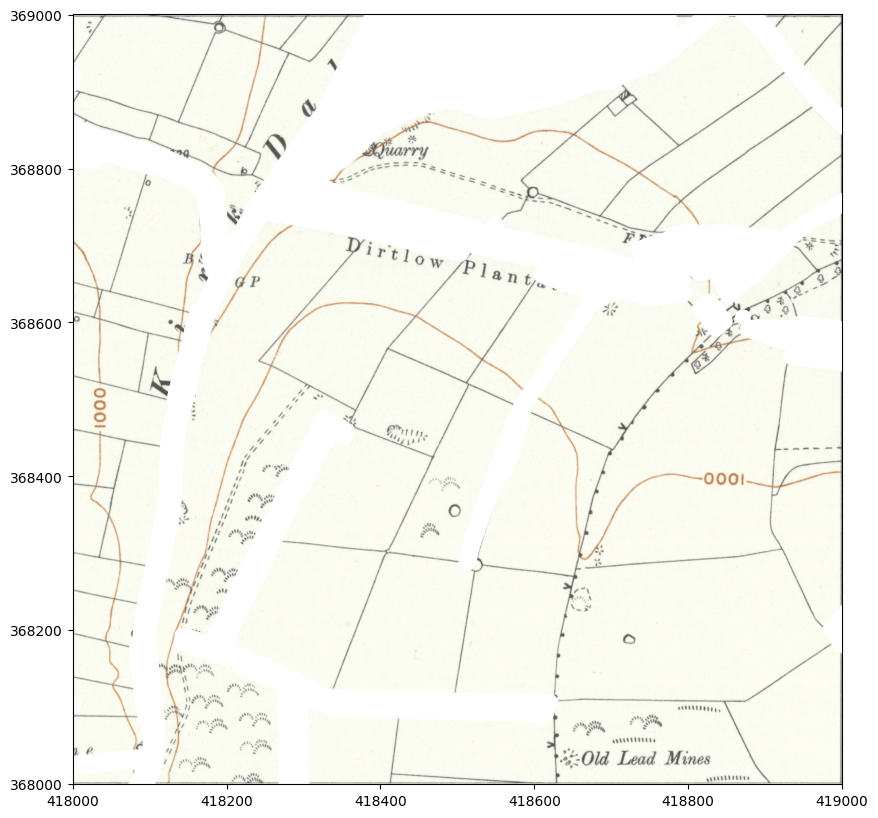

In [73]:
raster_plotter = RasterPlotter(lyr)
raster_plotter.plot_over_raster(SK1868)

### Create Text-Mask

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
3/3 [==============================] - 3s 554ms/step
Detected 94 words or letters


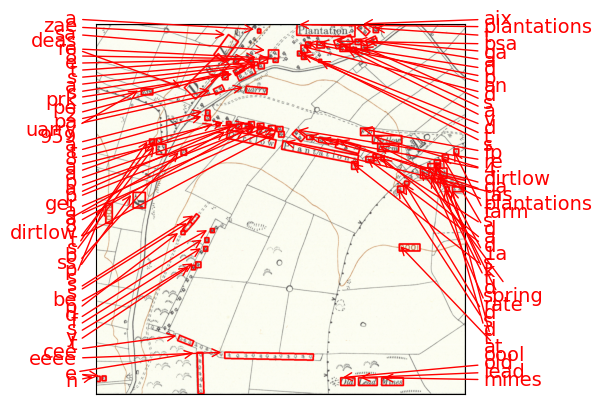

In [70]:
from mask_os import Text_Mask
SK1868t = Text_Mask(lyr)
# Returns 
SK1868t = SK1868t.k_mask()

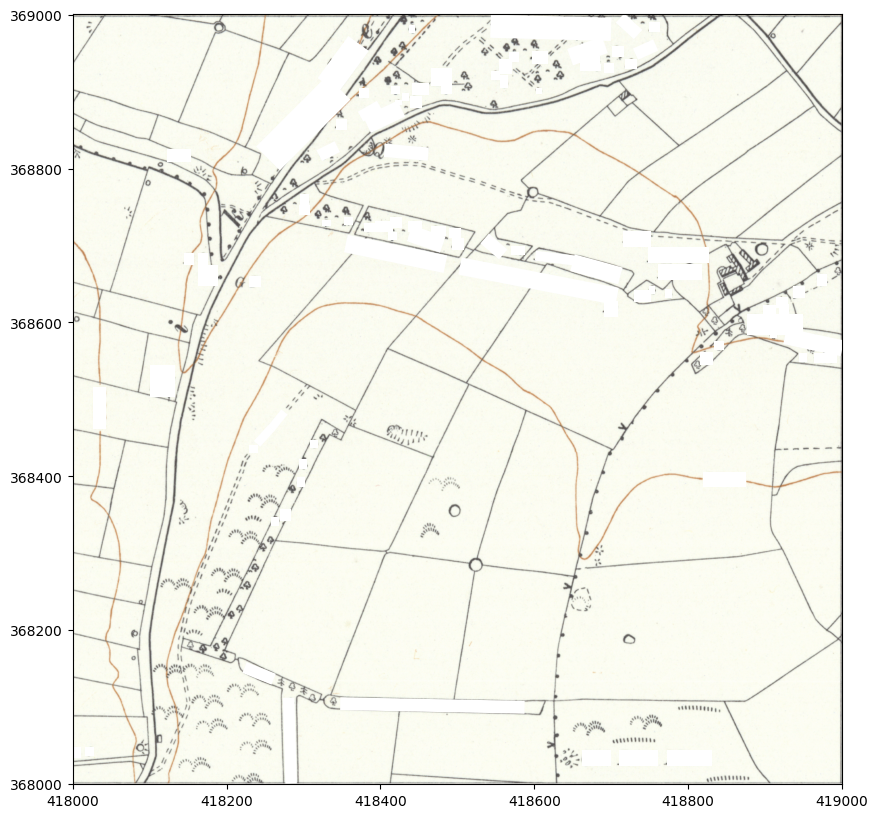

In [72]:
raster_plotter = RasterPlotter(lyr)
raster_plotter.plot_over_raster(SK1868t)

### Combine Masks

ngd_buildings query contains the following number of features:18
ngd_sites query contains the following number of features:1
railways query is empty!
ngd_land query contains the following number of features:129
ngd_water query contains the following number of features:1
road query is empty!
ngd_track query contains the following number of features:34
waterlink query is empty!
waterlinkset query is empty!
-- Total OS Collections Data Set Contains: 183 values
-- Final Subsetted Data Set Contains: 90
Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
3/3 [==============================] - 3s 549ms/step
Detected 94 words or letters


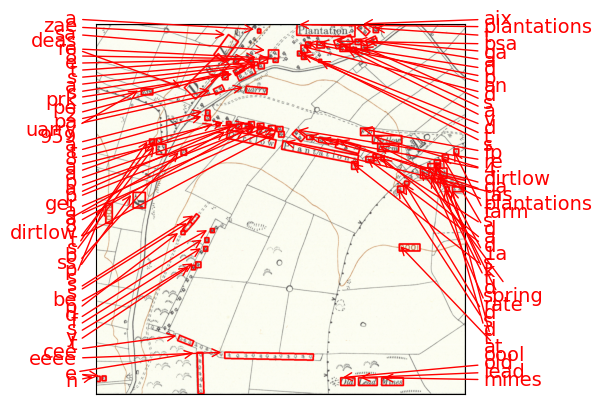

In [75]:
combined_mask_instance = CombinedMask(lyr, collections, subsets)
merged_mask = combined_mask_instance.merge_masks()

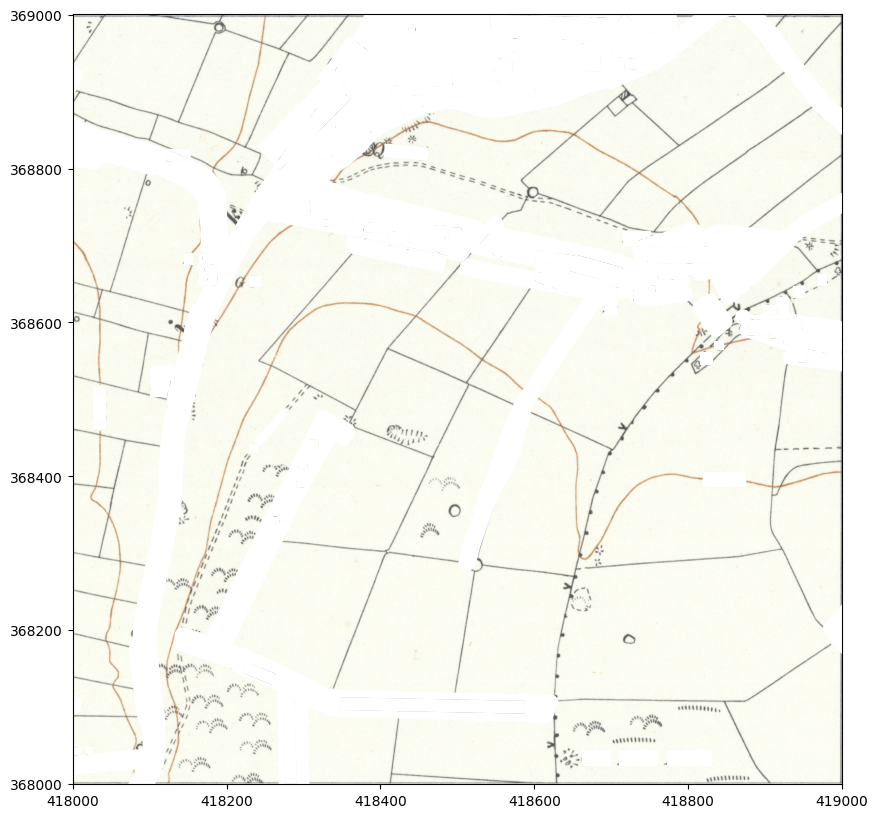

In [76]:
# Plot the merged mask over the raster
raster_plotter = RasterPlotter(lyr)
raster_plotter.plot_over_raster(merged_mask)

#### Output as raster for map-reader.ipynb

In [16]:
# add a column for raster value labels
SK1868['theme'] = 1
SK1868.head()

,geometry,theme
0,"MULTIPOLYGON (((418000.330 368869.009, 418000....",1


In [17]:
# raster calcs
print(lyr.width)
print(lyr.height)
print(lyr.meta)

1490
1491
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 1490, 'height': 1491, 'count': 3, 'crs': CRS.from_epsg(27700), 'transform': Affine(0.6713639789762135, 0.0, 417999.7823474275,
       0.0, -0.6713639789762267, 369000.65026383003)}


In [29]:
import export
ex_raster = convert_shp_mask_to_raster(df_shp=SK1868,
                                           plot_raster=False,
                                           save_raster=True,
                                           verbose=1)

Current data size cube is 17.820444 MB
New cube data size is 2.24844 MB
Saved to ../content/tifs/mask.tif
